In [1]:
import cv2
import matplotlib.pyplot as plt
import supervision as sv
import torch
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry


In [2]:
# config
CHECKPOINT = "../model/sam_vit_h_4b8939.pth"
MODEL_TYPE = "vit_h"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


In [3]:
# read image
img = cv2.imread("../data/uber.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [4]:
# generate mask
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT)
sam.to(device=DEVICE)

# parameter ref
# https://www.chowagiken.co.jp/blog/sam_parameter
mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side=32,
    pred_iou_thresh=0.980,
    stability_score_thresh=0.96,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,
)
result = mask_generator.generate(img)


In [5]:
# create annotated image
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
detections = sv.Detections.from_sam(result)
annotated_image = mask_annotator.annotate(img, detections)


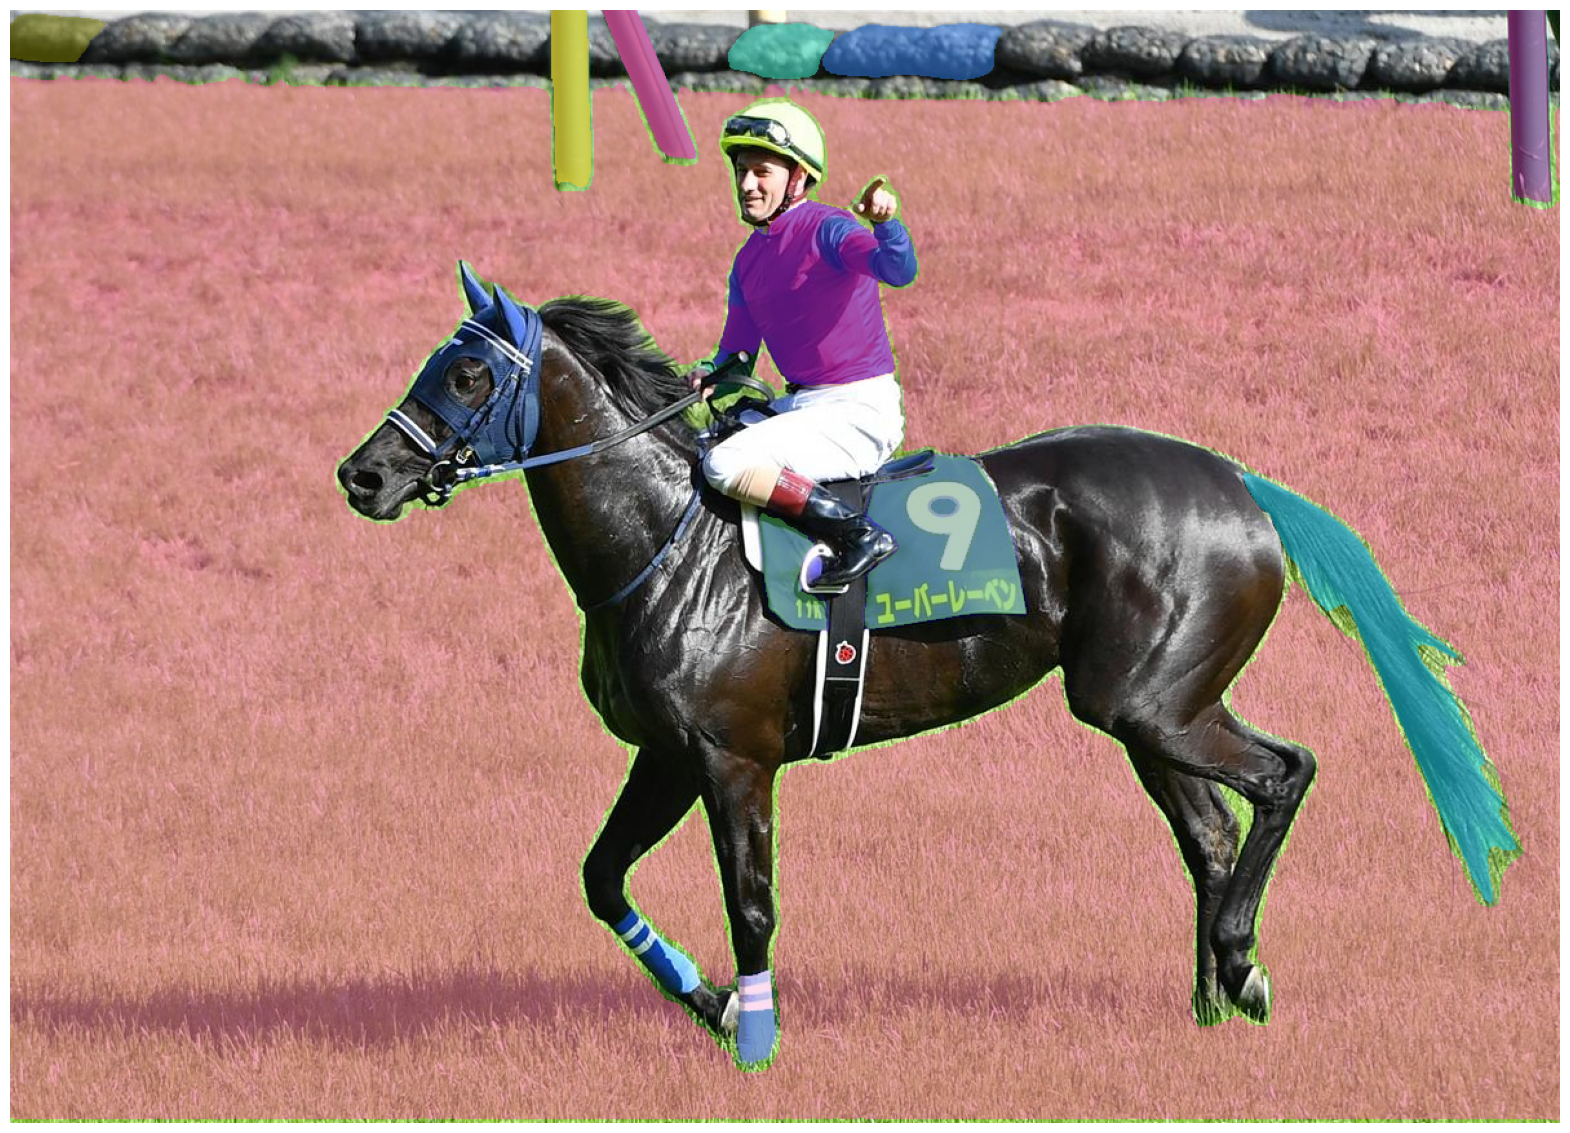

In [6]:
# show result
plt.figure(figsize=(20, 20))
plt.imshow(annotated_image)
plt.axis("off")
plt.show()


In [7]:
len(result)


14

In [8]:
result[0]


{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 3782,
 'bbox': [419, 0, 30, 137],
 'predicted_iou': 1.0018022060394287,
 'point_coords': [[443.53125, 18.0625]],
 'stability_score': 0.9884302020072937,
 'crop_box': [0, 0, 747, 578]}

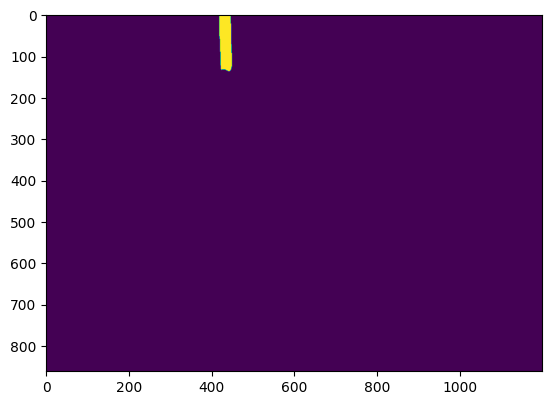

In [9]:
arr = result[0]["segmentation"].astype(int)
plt.imshow(arr)


In [10]:
arr


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
# point1, point2, お腹トップの三角形を作って上げればお腹がの具合分かるかも


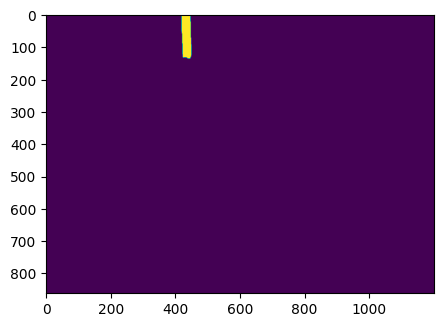

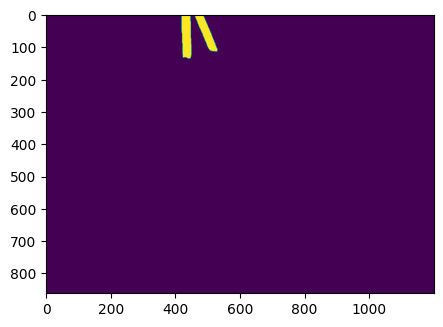

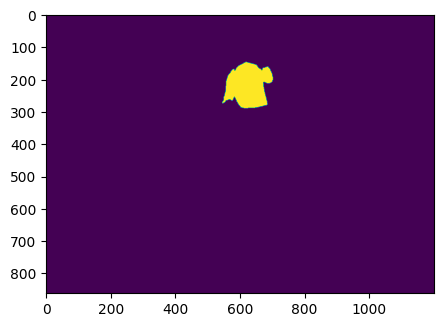

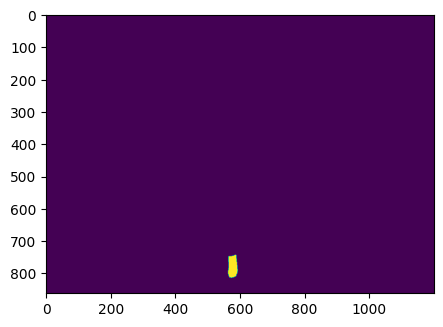

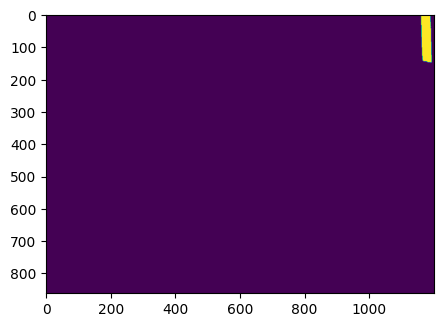

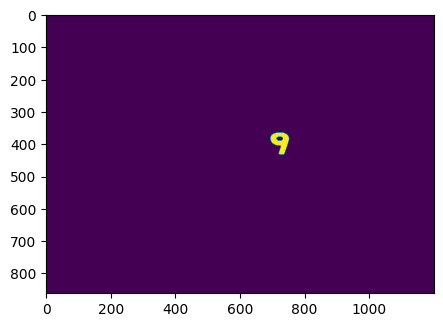

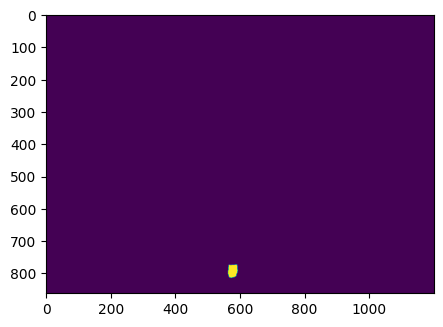

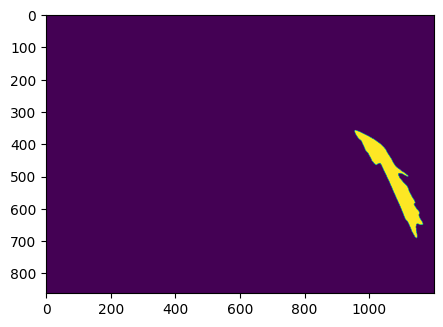

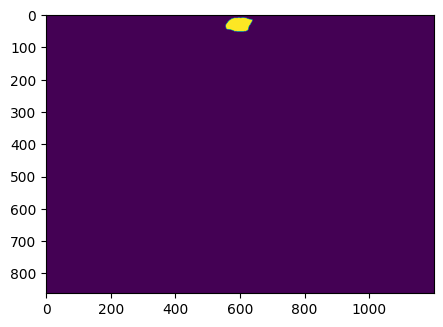

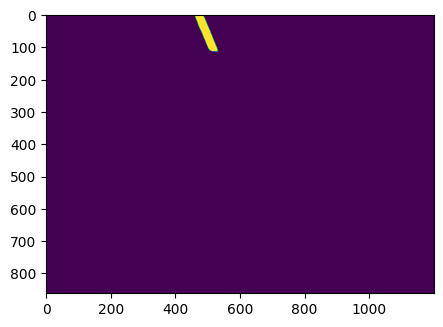

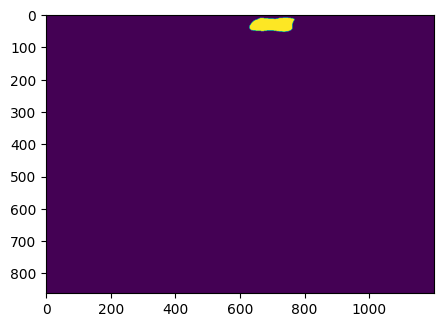

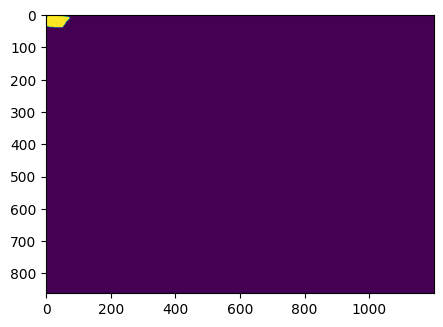

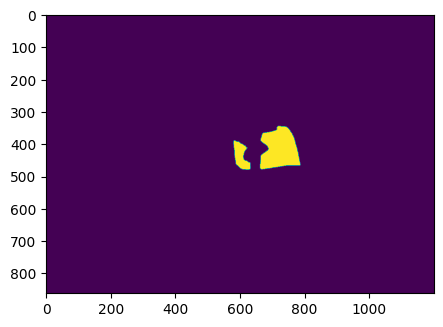

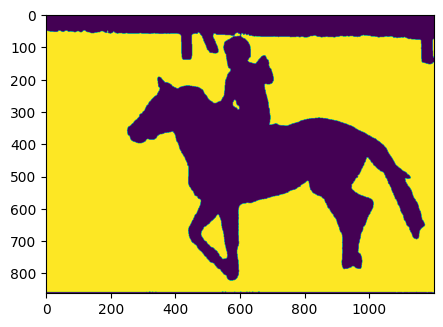

In [12]:
for i in range(len(result)):
    arr = result[i]["segmentation"].astype(int)
    plt.figure(figsize=(5, 5))
    plt.imshow(arr)
    plt.show()
